In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import chi2,norm,normaltest
from skimage.filters import threshold_otsu, threshold_yen, threshold_li
from helpers import *

# How to detect changes by using thresholds

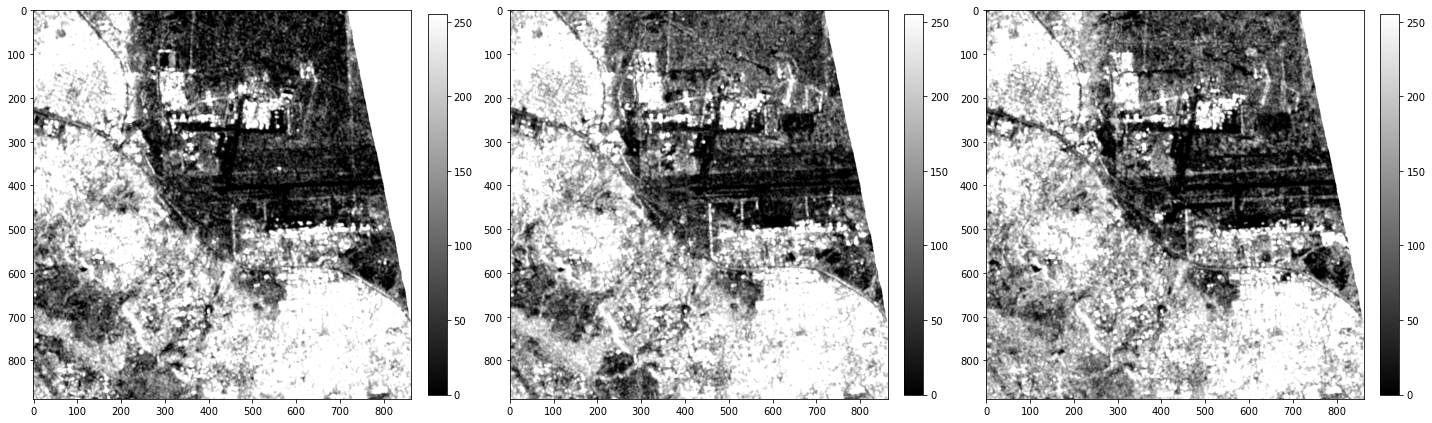

In [2]:
#Visualize temporal serie and see differences
img_data1=load_image('data/backscatterNiamey20180130.tif')
img_data2=load_image('data/backscatterNiamey20180611.tif')
img_data3=load_image('data/backscatterNiamey20180927.tif')
layers = []
layers.append(img_data1)
layers.append(img_data2)
layers.append(img_data3)
image = np.dstack(layers)
plot_bands_row(image, colormap=True)

[[-27 -22   0 ...   0   0   0]
 [-35 -27  -1 ...   0   0   0]
 [-37 -23  -6 ...   0   0   0]
 ...
 [ 46  28  -1 ...  31  40  41]
 [ 52  33   5 ...  17  25  26]
 [ 52  38   6 ...   0   3  -2]]


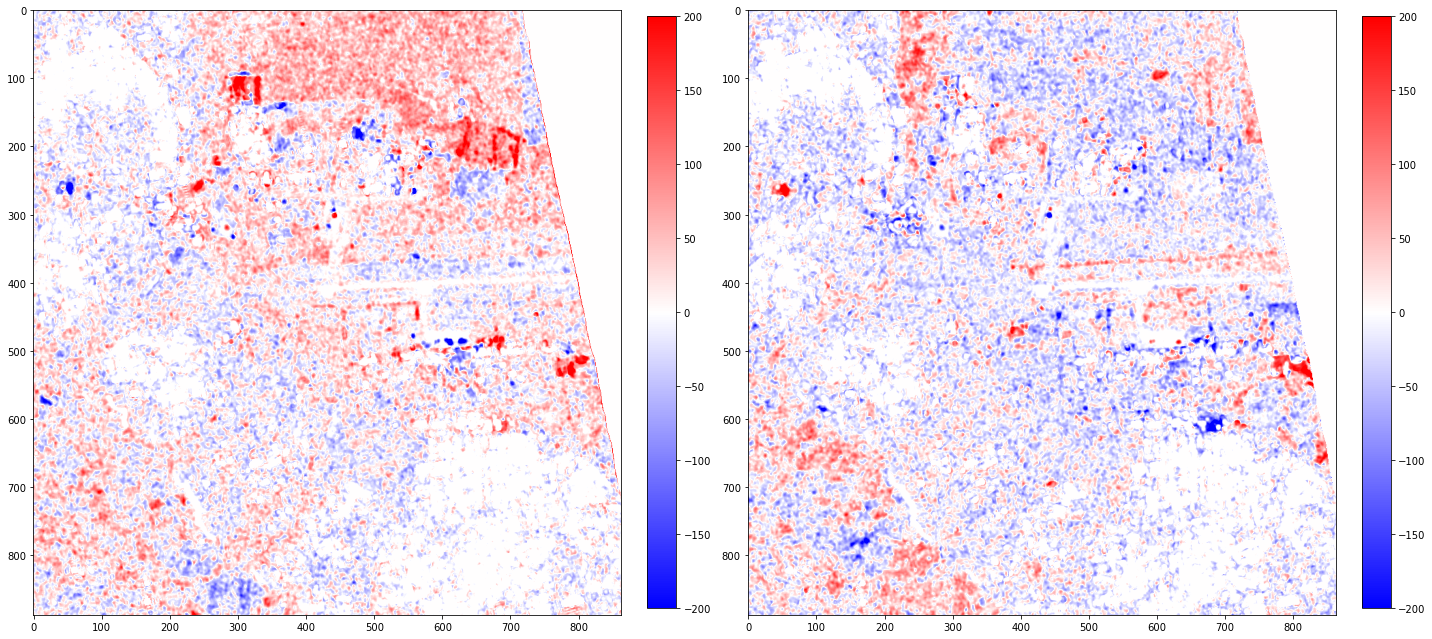

In [3]:
#How to visualize changes
diff=img_data2[:,:,0].astype(np.int32)-img_data1[:,:,0].astype(np.int32)
diff2=img_data3[:,:,0].astype(np.int32)-img_data2[:,:,0].astype(np.int32)
layersDiff = []
layersDiff.append(diff)
layersDiff.append(diff2)
imageDiff = np.dstack(layersDiff)
print(diff)
#plot_bands_row(diff,vmin=-200,vmax=200,cmap=plt.cm.bwr)
plot_bands_row(imageDiff,vmin=-200,vmax=200,cmap=plt.cm.bwr)

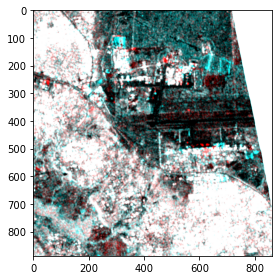

In [4]:
#RGB generation
plot_rgb(img_data1,img_data2,img_data2)

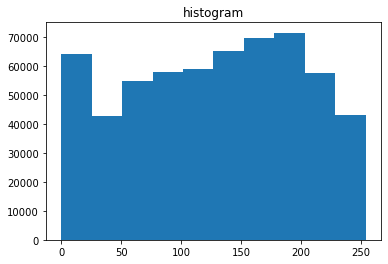

In [5]:
#histogram
masked = ma.masked_greater(img_data3[:,:,0], 254)
plt.hist(masked[~masked.mask]) 
plt.title("histogram") 
plt.show()

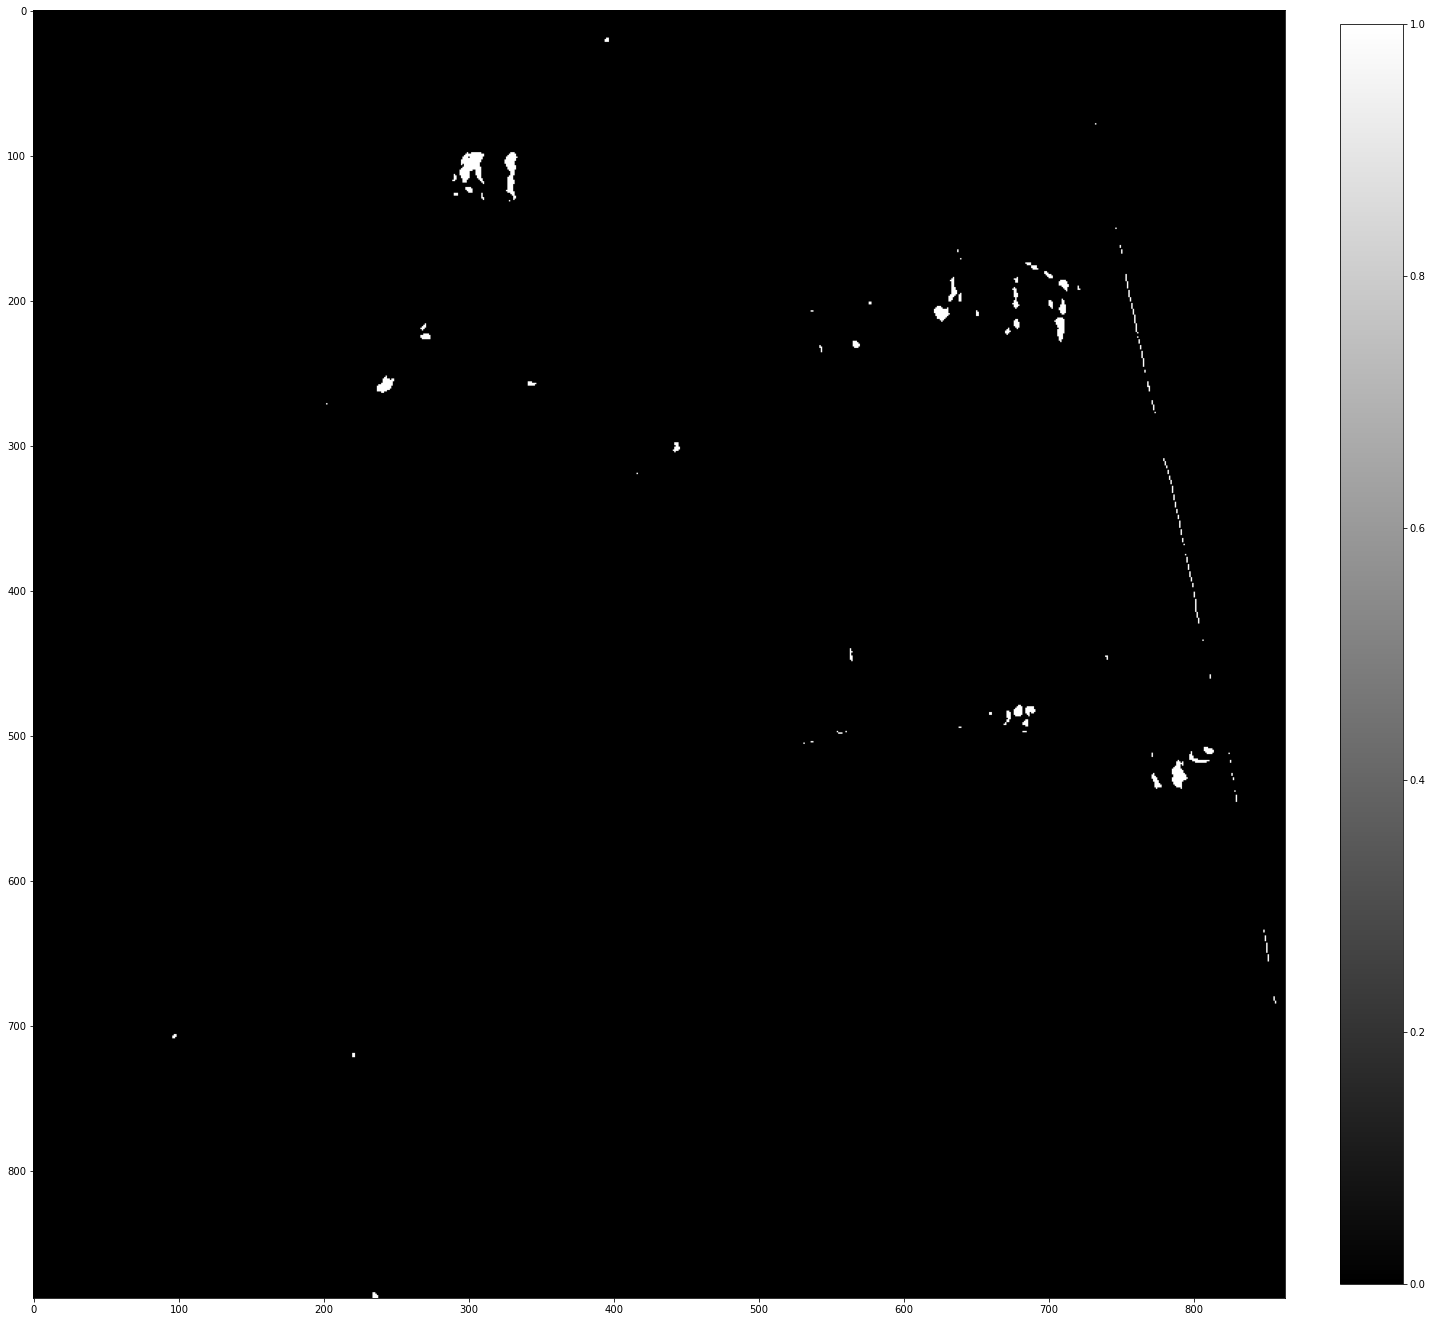

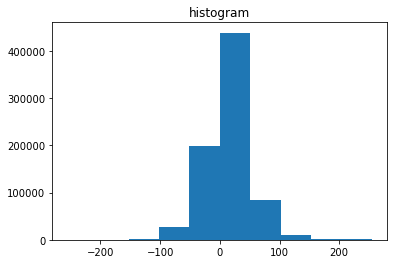

In [6]:
#Try user defined threshold

maskedDiff = ma.masked_where(diff>200, diff)
#print(maskedDiff.mask)
masked = maskedDiff[~maskedDiff.mask]
plot_bands_row(maskedDiff.mask,vmin=0,vmax=1)

plt.hist(diff.flatten()) 
plt.title("histogram") 
plt.show()

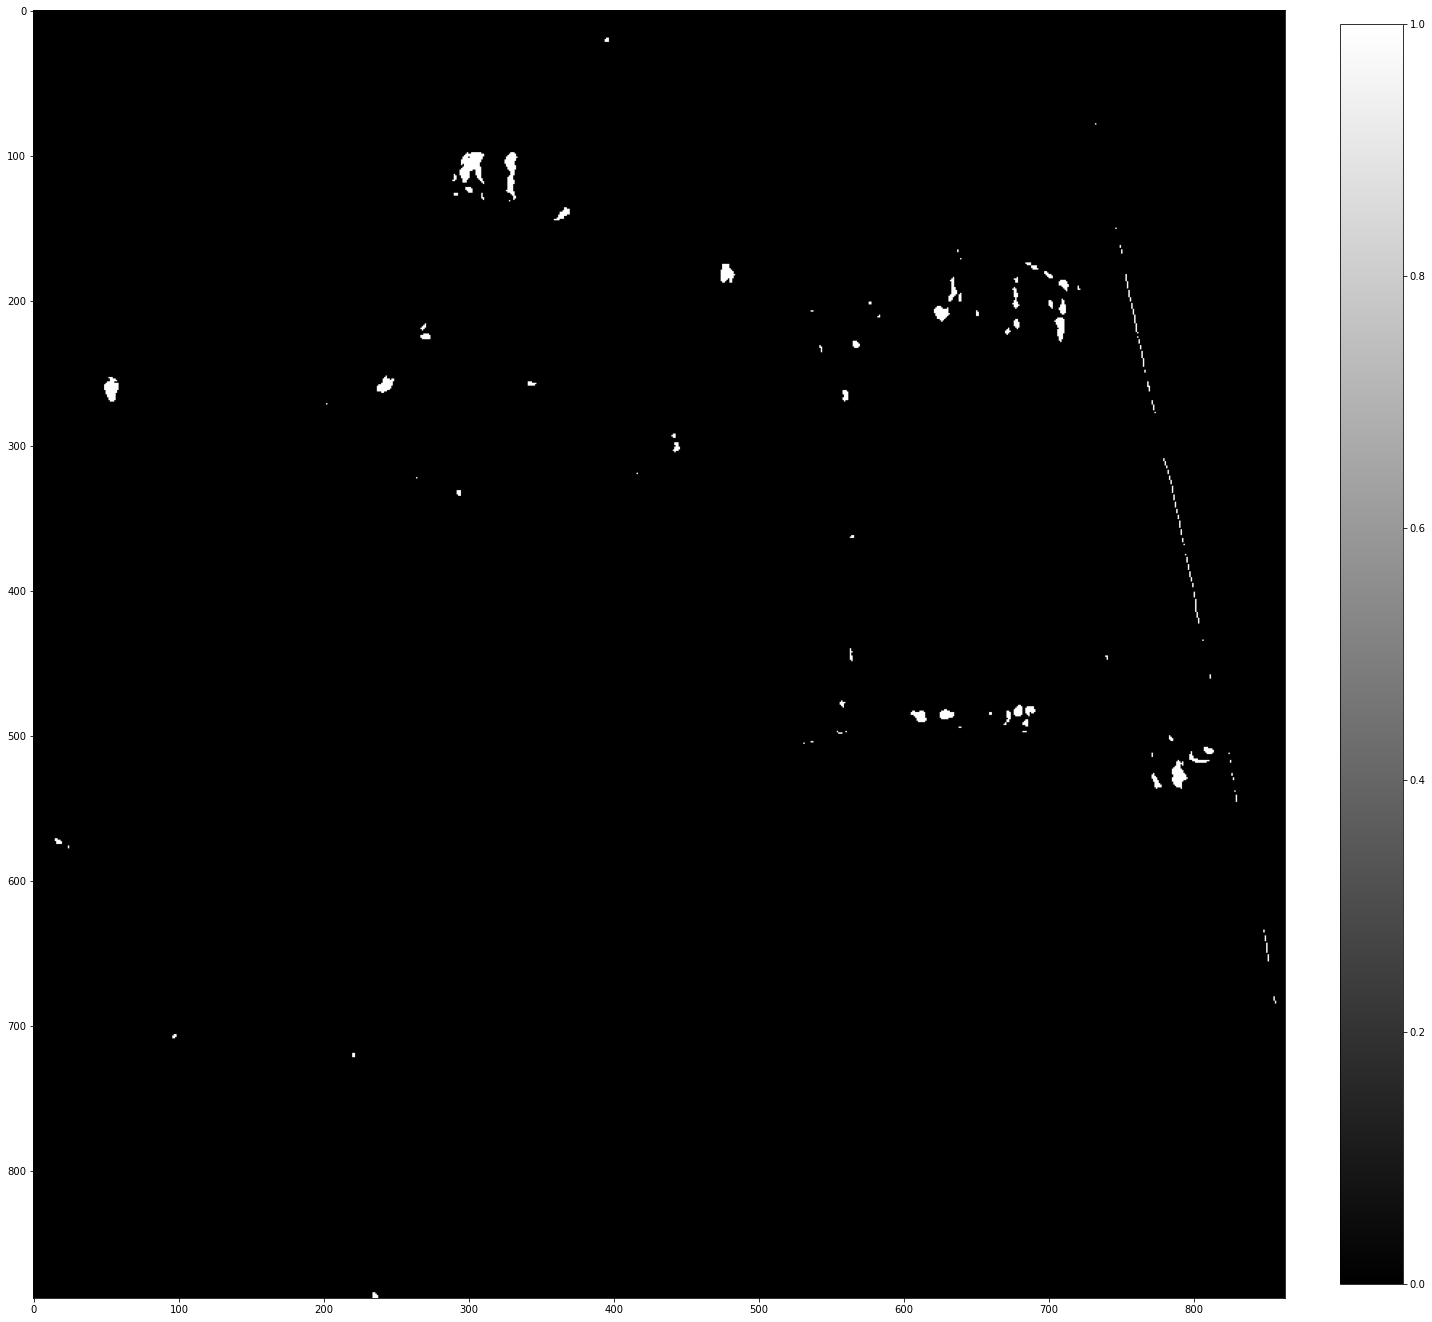

In [7]:
mask = np.zeros(diff.shape).astype(np.uint8)
mask = np.logical_or(np.logical_or(diff>200,diff<(0-200)),mask)
plot_bands_row(mask,vmin=0,vmax=1)

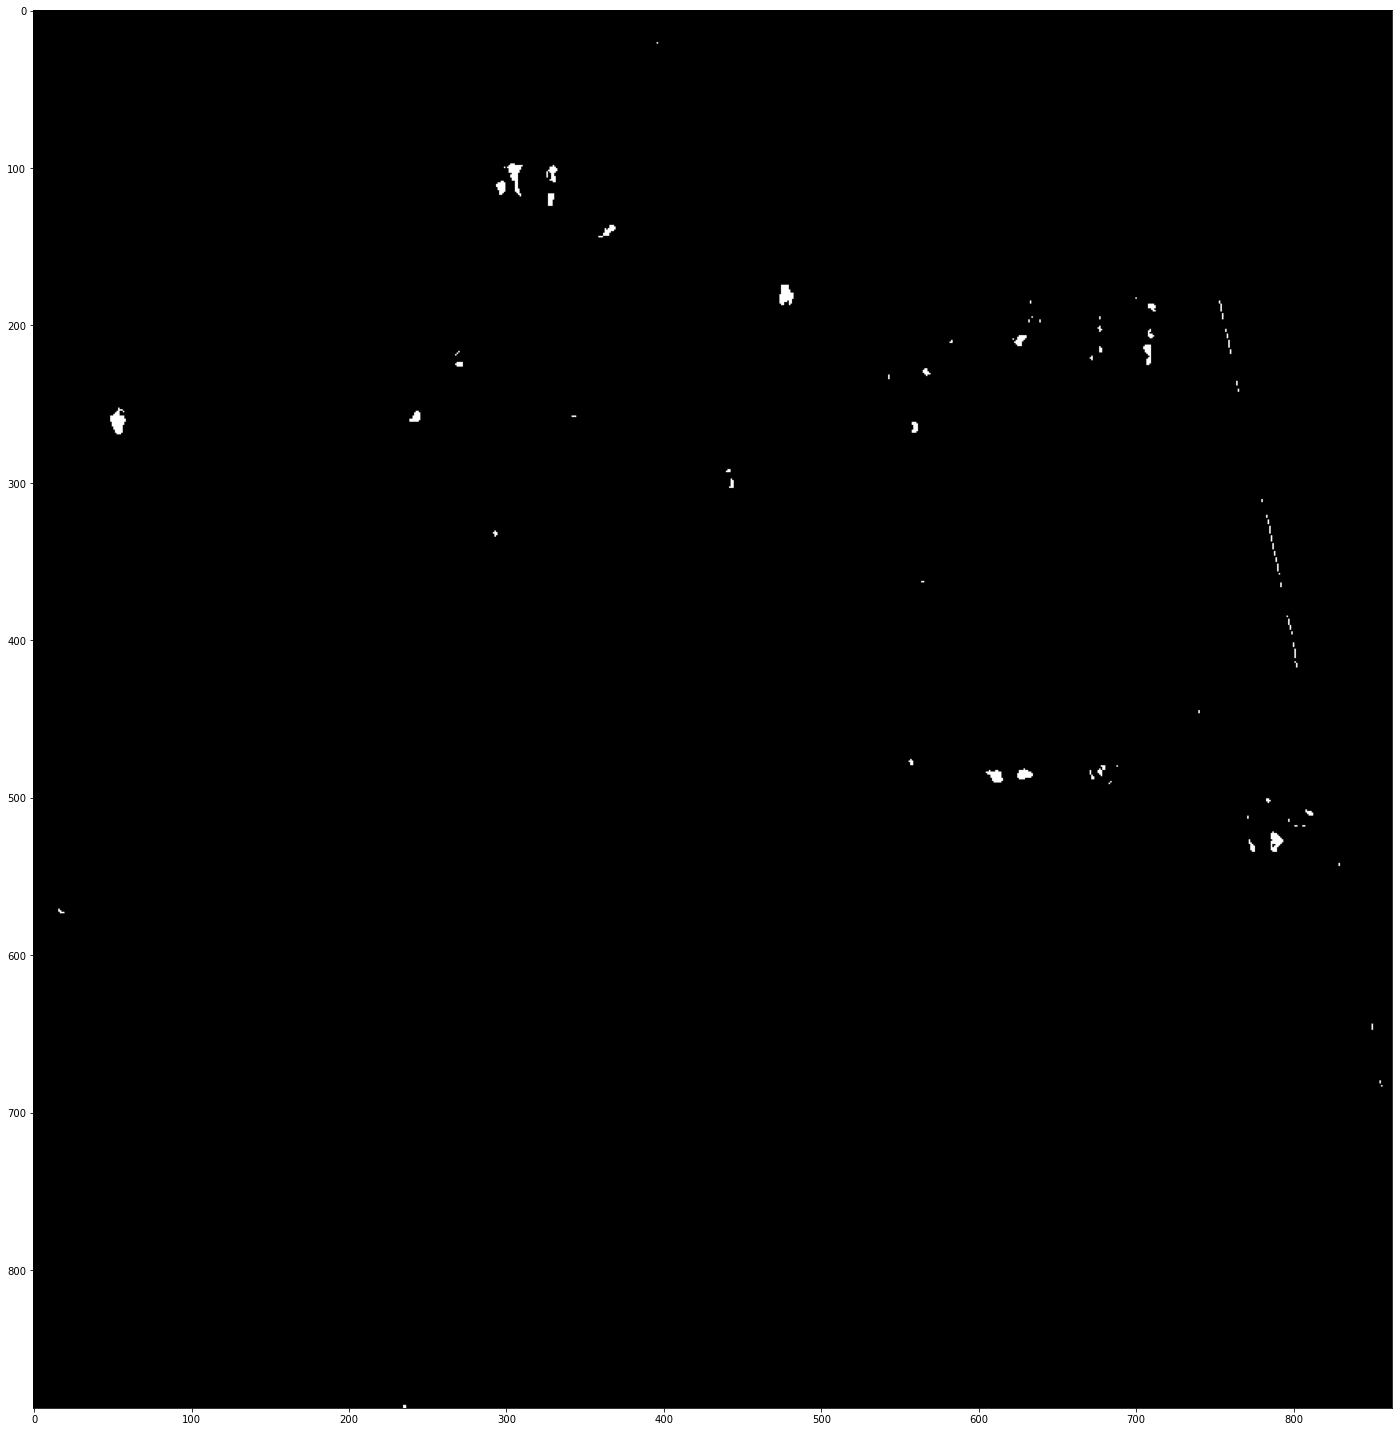

In [12]:
# statistical threshold (normal, chi2...)
#Normalize diff
std=np.std(diff)
mean=np.mean(diff)
diffNorm=(diff-mean)/std
error1=norm.isf(0.01)
error2=norm.isf(0.00000001)
mask = np.zeros(diff.shape).astype(np.uint8)
mask = np.logical_or(np.logical_or(diffNorm>error2,diffNorm<(0-error2)),mask)
plot_bands_row(mask,vmin=0,vmax=1)

130


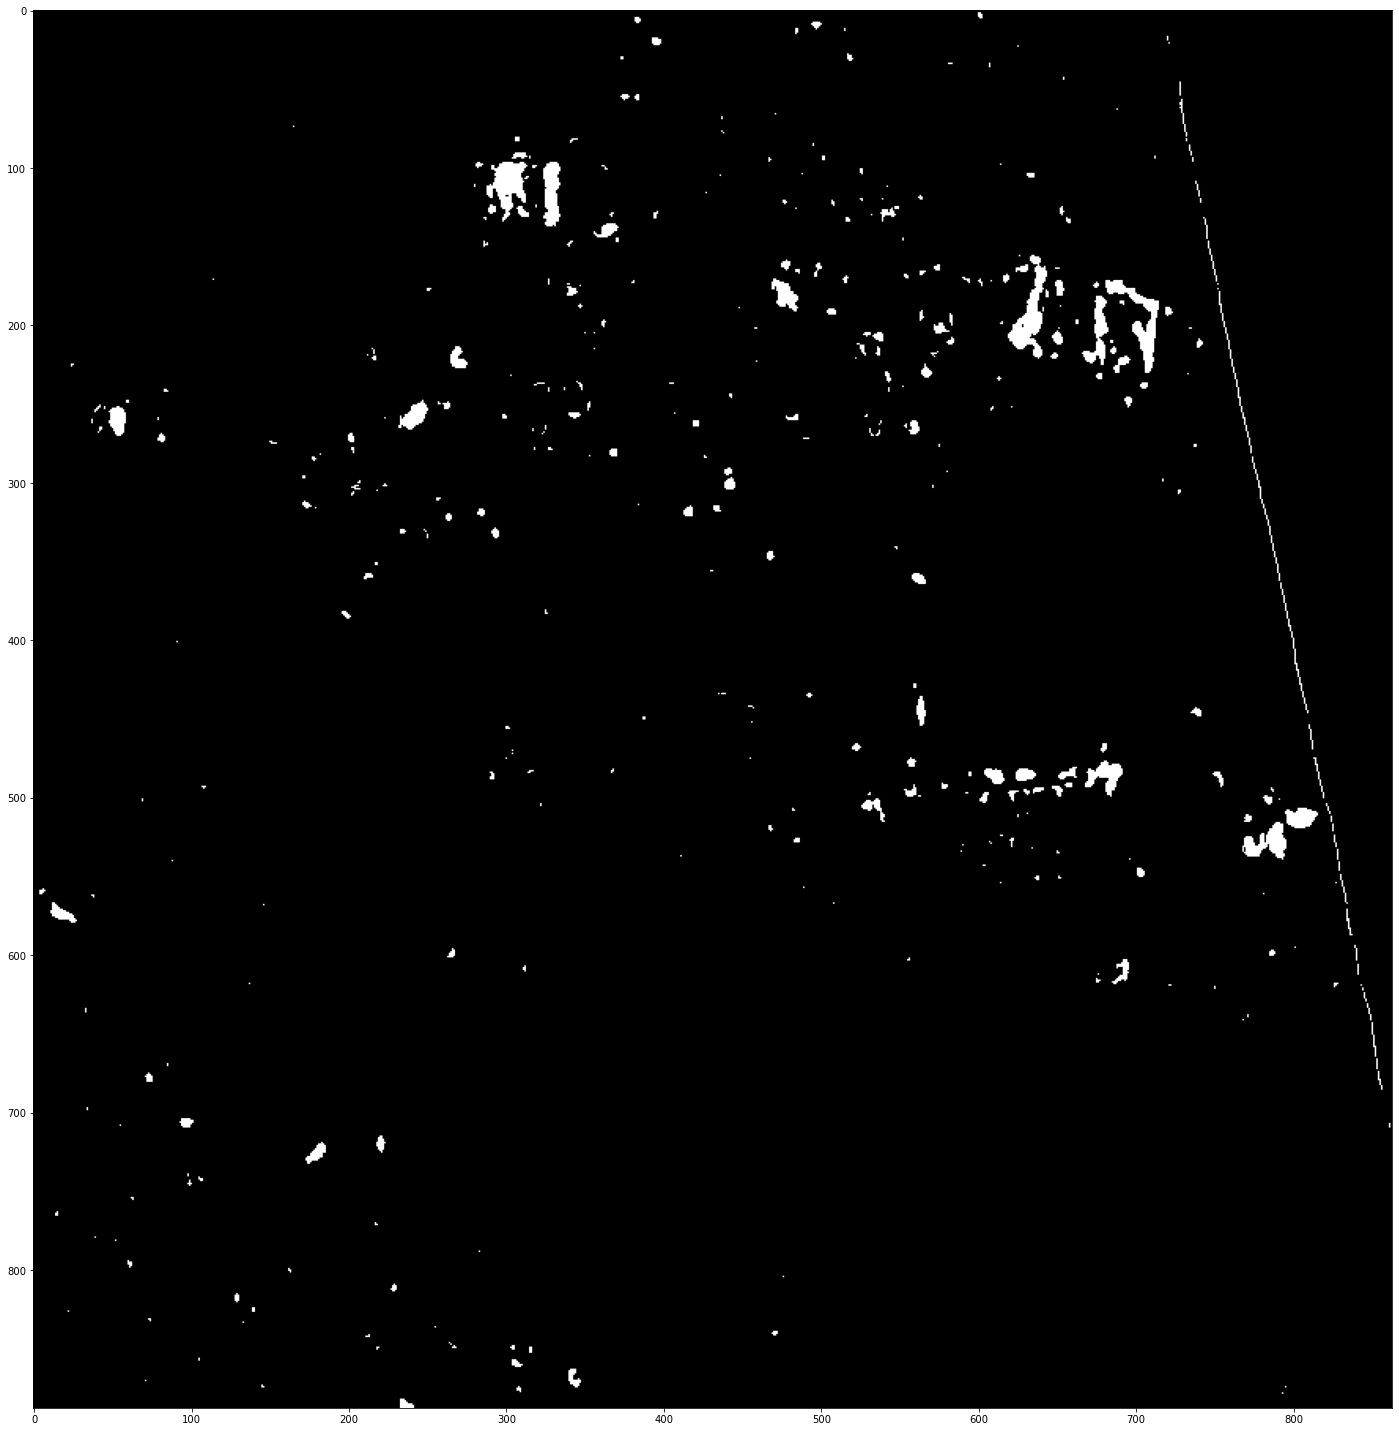

In [14]:
#other standards thresholds
yen=threshold_yen(np.absolute(diff))
print(yen)
mask = np.zeros(diff.shape).astype(np.uint8)
mask = np.logical_or(np.absolute(diff)>yen,mask)
plot_bands_row(mask,vmin=0,vmax=1)

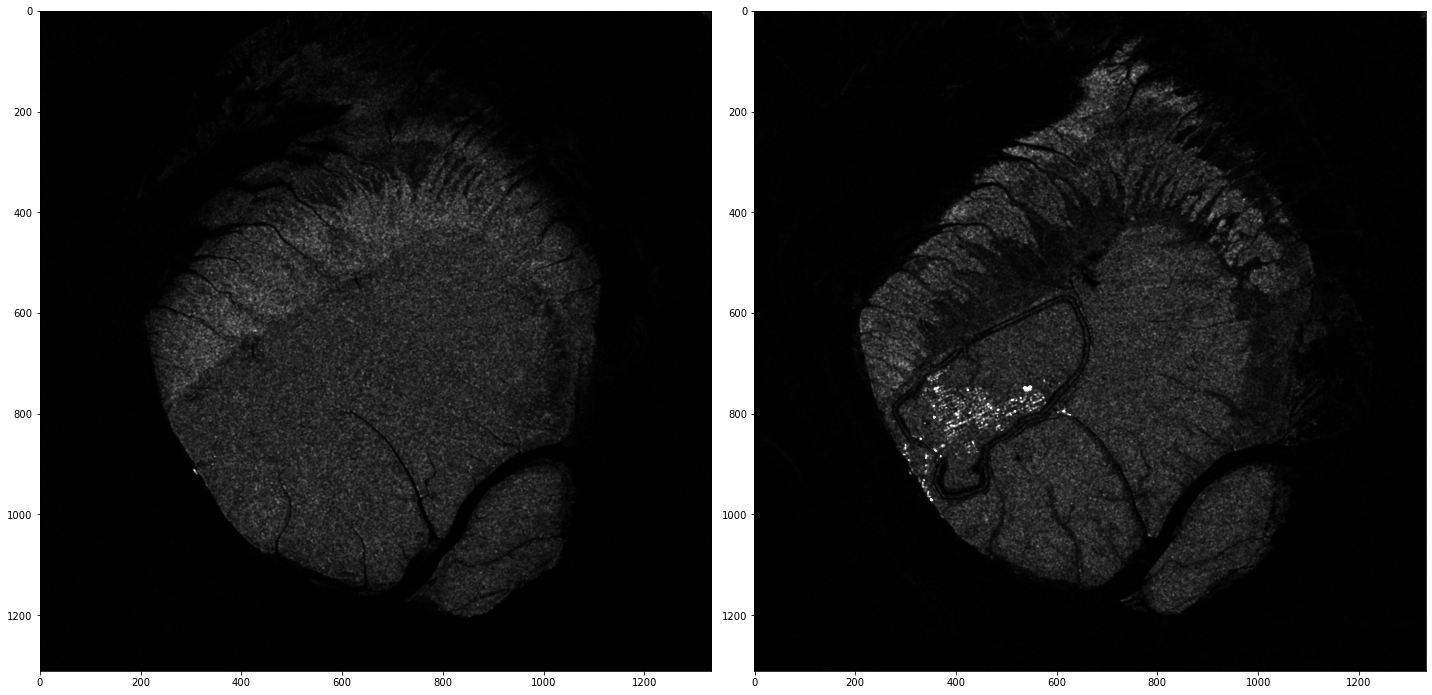

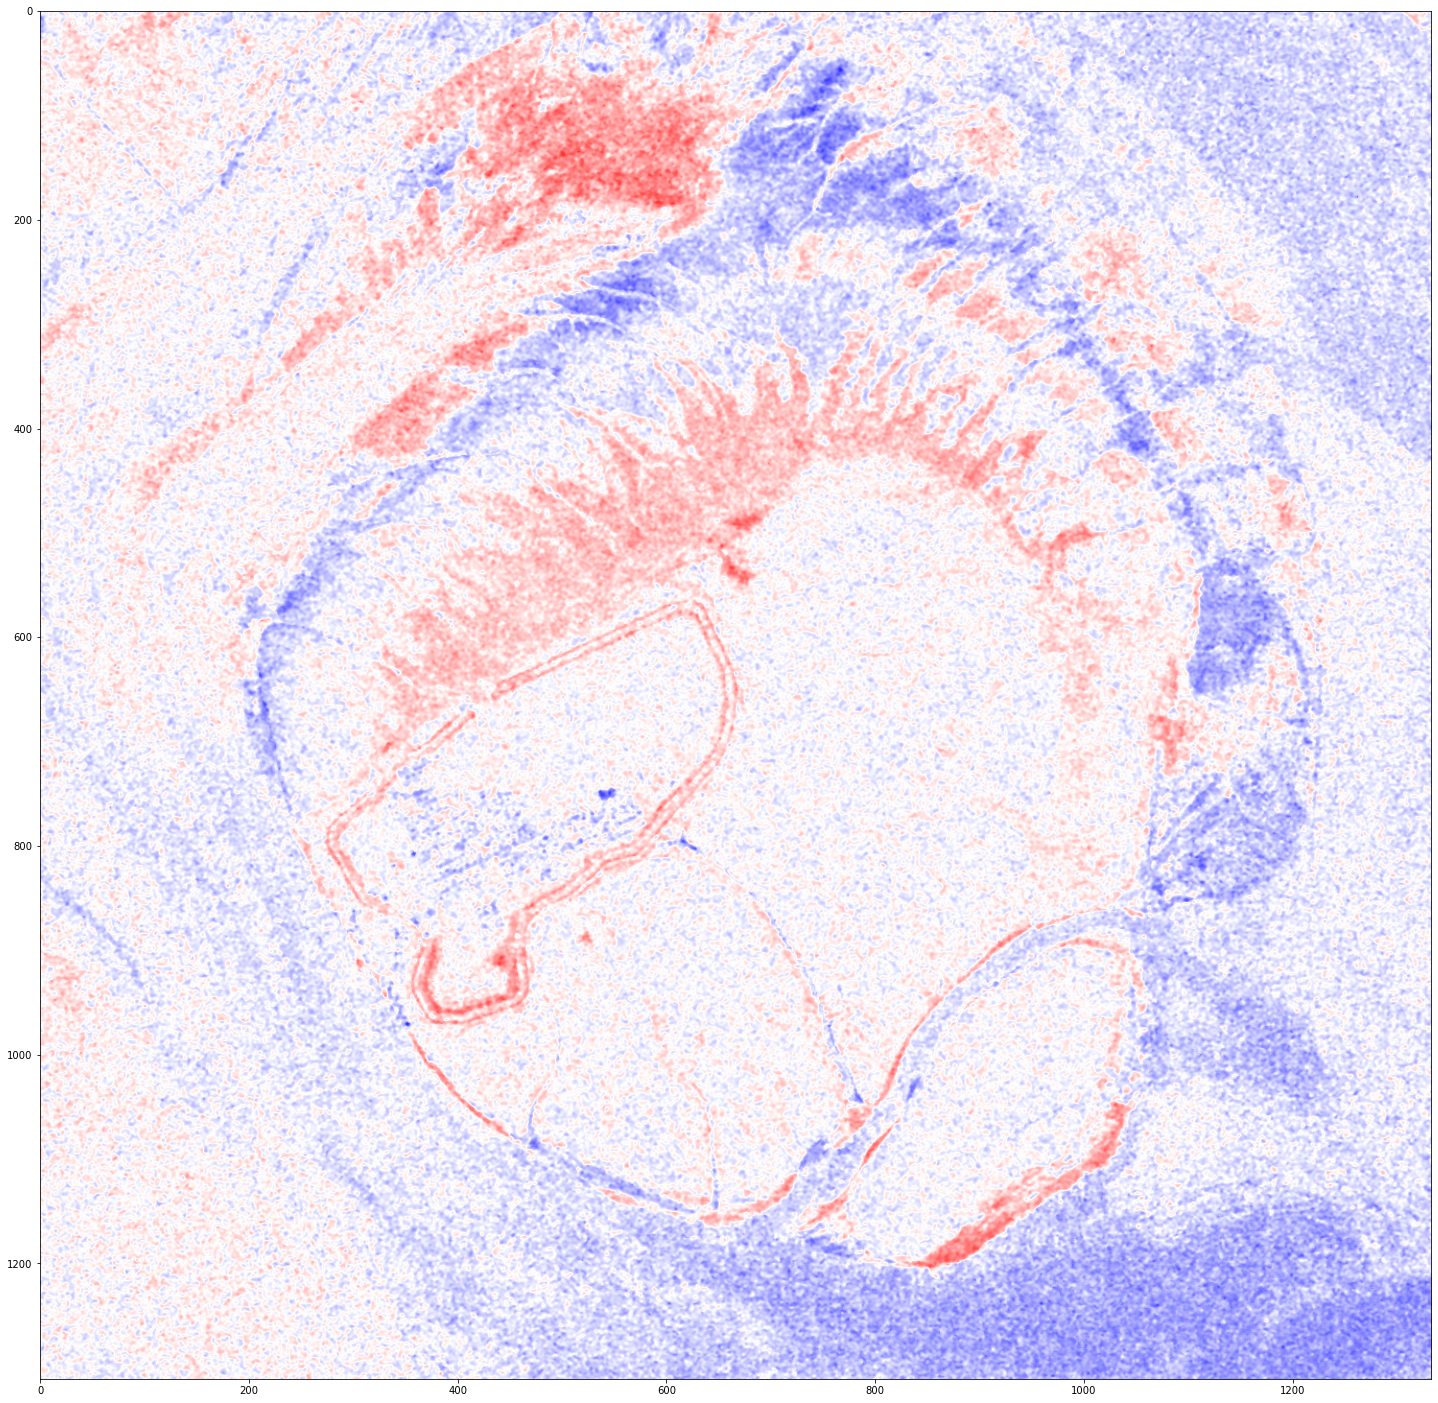

In [17]:
#from papers
charp_data1=load_image('data/backscatterCharpiya20171220.tif')
charp_data2=load_image('data/backscatterCharpiya20180910.tif')
dlr=np.log(charp_data1/charp_data2)
layers = []
layers.append(charp_data1)
layers.append(charp_data2)
#layers.append(dlr)
image = np.dstack(layers)
plot_bands_row(image,vmin=0,vmax=1)
plot_bands_row(dlr,vmin=-6,vmax=6,cmap=plt.cm.bwr)

In [ ]:
#TODO dllr and fusion dlr and dllr

#Proposed exercise binary map of new constructions/floodings